# Basic geospatial visualizations with Geopandas, Matplotlib, and Contextily

In [145]:
import os
import matplotlib.pyplot as plt
import contextily as ctx
import descartes as dsc
import pandas as pd
import geopandas as gp

# Reading data with `geopandas`

`geopandas` can read almost any vector-based spatial data format 
including ESRI shapefile, GeoJSON files and more using the command

In [178]:
#os.chdir('../data')
dr = os.getcwd()
fdr = 'data/geospatialData'
in_f = 'GERMANY_ADMIN_1890.shx'
target = os.path.join(dr, fdr, in_f)
df = gp.read_file(target)

In [179]:
df.head(1).T

,0
DIV1,KÃ¶nigreich Bayern
DIV2,None
DIV2TYPE,None
DIV3,Oberbayern
DIV3TYPE,Regierungsbezirk
ADMIN_UNIT,Traunstein (Stadt)
ADMIN_TYPE,Unmittelbare Stadt
EXCLAVE_DU,0
FEAT_NAME,Traunstein (Stadt)
FEAT_TYPE,Unmittelbare Stadt


# Double-check the coordinate reference systems

Web map tiles are typically provided in Web Mercator (EPSG 3857), so we  need to make sure to convert our data first to the same CRS to combine our polygons and background tiles in the same map.


In [180]:
# declare the coordinates reference system
df = df.set_crs(epsg=4326)

In [181]:
# encode the data so as they map onto the Web Mercator scale
df = df.to_crs(epsg=3857)

In [182]:
# data preview

df.head(1).T

,0
DIV1,KÃ¶nigreich Bayern
DIV2,None
DIV2TYPE,None
DIV3,Oberbayern
DIV3TYPE,Regierungsbezirk
ADMIN_UNIT,Traunstein (Stadt)
ADMIN_TYPE,Unmittelbare Stadt
EXCLAVE_DU,0
FEAT_NAME,Traunstein (Stadt)
FEAT_TYPE,Unmittelbare Stadt


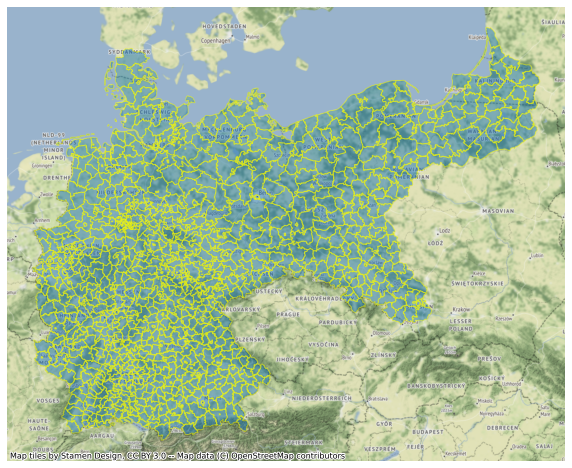

In [183]:
# plot the data

ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='yellow')
ax.set_axis_off()
ctx.add_basemap(ax)

# Passing lat-long data

In [184]:
# creating a pandas df
df = pd.DataFrame({'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
                   'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
                   'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
                   'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

In [185]:
df.head(1).T

,0
City,Buenos Aires
Country,Argentina
Latitude,-34.58
Longitude,-58.66


In [186]:
# from pandas to geopandas df
points = gp.points_from_xy(df.Longitude, df.Latitude)
cities = gp.GeoDataFrame(df, geometry=points)

In [187]:
cities

,City,Country,Latitude,Longitude,geometry
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66000 -34.58000)
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91000 -15.78000)
2,Santiago,Chile,-33.45,-70.66,POINT (-70.66000 -33.45000)
3,Bogota,Colombia,4.60,-74.08,POINT (-74.08000 4.60000)
4,Caracas,Venezuela,10.48,-66.86,POINT (-66.86000 10.48000)


In [188]:
# get country borders from a dataset included in geopandas
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))

In [189]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


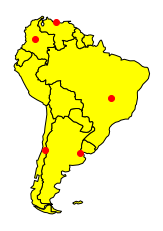

In [190]:
# make the plot
sa = world.loc[world['continent'] == 'South America']
ax = sa.plot(color='yellow', edgecolor='k')
cities.plot(ax=ax, color='red')
ax.set_axis_off()
plt.show()

# Plotting boundaries and points in a same chart

In [191]:
# brazilian airports
in_f = 'wld_trs_airports_wfp.shp'
target = os.path.join(dr, fdr, in_f)
# all airports
all_airp = gp.read_file(target)
br_airp = ar.loc[ar['country'] == 'Brazil']

In [192]:
# admin boundaries of Brazil
br = world.loc[world['name'] == 'Brazil']

In [193]:
# make crs consistent - let's use Web Mercator scale
br = br.to_crs(epsg=3857)
br_airp = br_airp.to_crs(epsg=3857)

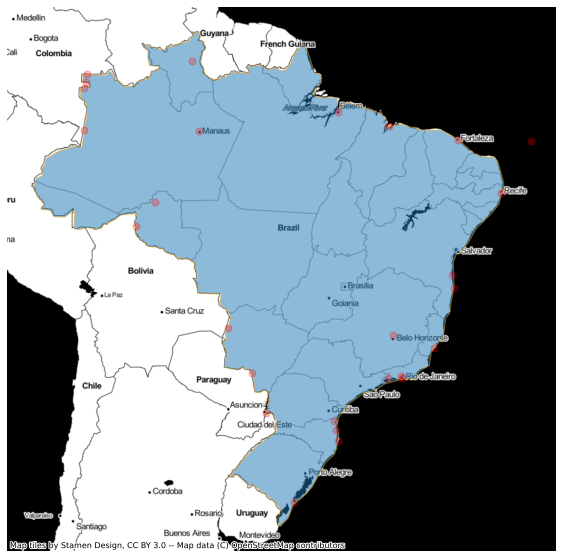

In [194]:
# plot the data
ax = br.plot(figsize=(10, 10), alpha=0.5, edgecolor='orange')
br_airp.plot(ax=ax, alpha=0.25, color='r', markersize=50)
ax.set_axis_off()
ctx.add_basemap(ax, source=ctx.providers.Stamen.Toner)
plt.show()